# 2.1 Solution Curves Without a Solution

## 2.1.1 Direction Fields

一階 ODE，例如

$$
y' = \frac{x}{y}
$$

是可以解的。但是

$$
y'=x-y^2
$$

則不易解出。在介紹解題方法之前，我們可以先從幾何觀點，來探討一階 ODE的解之特性。


一階 ODE 的通式可表為

$$
\begin{align}
y'=f(x,y) & \quad \text{or} \quad & \frac{dy}{dx}=f(x,y) \tag{1}
\end{align}
$$

而在 $x$-$y$ 平面上，$dy/dx$ 亦為函數 $y=y(x)$ 的斜率。換言之，若 $y_1(x)$ 
為式 (1) 的解，代入後即得

$$
f(x,y_1(x)) = y_1' = y_1(x) \mbox{ 之斜率}
$$

因此，我們如將 $f(x,y)$ 當成斜率繪於 $x$-$y$ 平面上，便可觀察出式 
(1) 的解。這樣的圖稱為 direction field (方向場)。運用 SAGE，可以很方便地將 direction field 繪出。

### Example 1

試繪出微分方程式 $dy/dx = 0.2xy$ 的方向場及解曲線 (solution curve)。
(課本 Example 1)

首先繪出方向場。在 SageMath 中，首先定義 $x$ 與 $y$ 為變數，再使用指令 `plot_slope_field` 繪出函數 $f(x,y) = 0.2 xy$ 的方向場。指令中設定繪圖範圍為 $-5 \le x \le 5$, $-5 \le y \le 5$, 以及圖形之長寬比為 1:1:

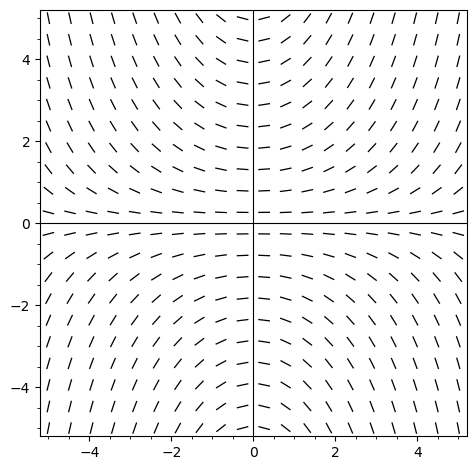

In [11]:
var("x", "y")
plot_slope_field(0.2*x*y, (x, -5, 5), (y, -5, 5), aspect_ratio=1)

接著求出此微分方程式的解，以與方向場比較：

1. 設定變數與函數關係；
2. 定義微分方程式為物件 `DE`；
3. 使用指令 `desolve` 解出方程式，並命名為 `sol`。

指令 `diff(y, x)` 表示 $dy/dx$, `==` 表示數學的相等。

注意：在程式語言中，一個等式 `=` 代表賦值或是物件的命名，而非數學的相等。

In [2]:
# 設定變數與函數關係
var("x", "y")
y = function("y")(x)

# 定義微分方程式
DE = diff(y, x) == 0.2*x*y

# 求解微分方程式
sol = desolve(DE, y)
sol

_C*e^(1/10*x^2)

輸出的解，符號 `_C` 代表待定係數。若加入 `%display latex` 指令，則可輸出使用 LaTeX 產生的美觀數學符號。

In [3]:
%display latex
sol

_C*e^(1/10*x^2)

此 ODE 的解為 $y = c e^{0.1 x^2}$。在此方向場中，繪出 $c = 1$ 與 $c = -2$ 的解曲線：

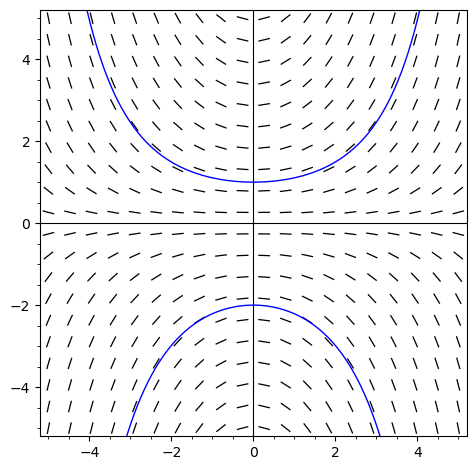

In [4]:
var("x", "y")

# C = 1 之解的繪圖
y1 = plot(exp(0.1*x^2), (x, -5, 5), ymin=-5, ymax=5)

# C = -2 之解的繪圖
y2 = plot(-2*exp(0.1*x^2), (x, -5, 5), ymin=-5, ymax=5)

# 方向場繪圖
sf = plot_slope_field(0.2*x*y, (x, -5, 5), (y, -5, 5), aspect_ratio=1)

# 將三張圖放在同一座標系中
y1+y2+sf

這些曲線都是 $y'=0.2xy$ 的解，稱為 '解曲線'。
事實上，此 ODE 的解為 $y=c e^{0.1x^2}$，其中 $c$ 為任意常數，因為不論 $c$ 值為何，將此式代入原
ODE 均能讓等式成立。

### Example 2

試繪出微分方程式 $dy/dx = \sin y$ 的方向場及解曲線 (solution curve)。
(課本 Example 2)

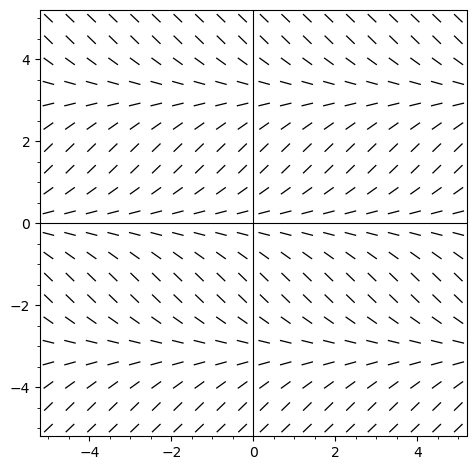

In [5]:
var("x", "y")
sf2 = plot_slope_field(sin(y), (x, -5, 5), (y, -5, 5), aspect_ratio=1)
sf2

可發現其方向場與 $x$ 無關。此類 ODE 稱為 autonomous ODE。

接著嘗試求出其通過 $(x,y) = (0, -3/2)$ 的解曲線, 即初始條件 (initial condition) 為 $y(0)=-3/2$ 的解：

In [12]:
%display latex

# 定義符號變量
var("x", "y")
y = function("y")(x)

# 定義微分方程
DE = diff(y, x) == sin(y)

# 求解微分方程，並指定初值條件 y(0) = -3/2
sol2 = desolve(DE, y, ics=[0, -3/2])
sol2

-1/2*log(cos(y(x)) + 1) + 1/2*log(cos(y(x)) - 1) == x - 1/2*log(cos(3/2) + 1) + 1/2*log(cos(3/2) - 1)

注意在 SageMath 中 `log` 是指自然對數 $\ln$。輸出的結果還可以做以下的轉換：

In [7]:
# 使用 display plain 可將結果輸出回復到一般模式：
%display plain
sol2

-1/2*log(cos(y(x)) + 1) + 1/2*log(cos(y(x)) - 1) == x - 1/2*log(cos(3/2) + 1) + 1/2*log(cos(3/2) - 1)

In [8]:
# 使用 latex() 函數可以將結果輸出為 LaTeX 的指令碼，以作為方程式的文書編輯：
latex(sol2)

-\frac{1}{2} \, \log\left(\cos\left(y\left(x\right)\right) + 1\right) + \frac{1}{2} \, \log\left(\cos\left(y\left(x\right)\right) - 1\right) = x - \frac{1}{2} \, \log\left(\cos\left(\frac{3}{2}\right) + 1\right) + \frac{1}{2} \, \log\left(\cos\left(\frac{3}{2}\right) - 1\right)

由於此解為隱函數 (implicit function) 的型態，故無法用一般的函數繪圖指令 `plot`，而需用隱函數的繪圖指令 `implicit_plot`。

先將此解表示為隱函數的型態：

$$
f(x,y) = -\frac{1}{2} \, \log\left(\cos\left(y\left(x\right)\right) + 1\right) + \frac{1}{2} \, \log\left(\cos\left(y\left(x\right)\right) - 1\right) - x + \frac{1}{2} \, \log\left(\cos\left(\frac{3}{2}\right) + 1\right) - \frac{1}{2} \, \log\left(\cos\left(\frac{3}{2}\right) - 1\right) = 0
$$

注意：使用 `implicit_plot` 時，函數需表示為 $f(x,y) = 0$ 的形式。

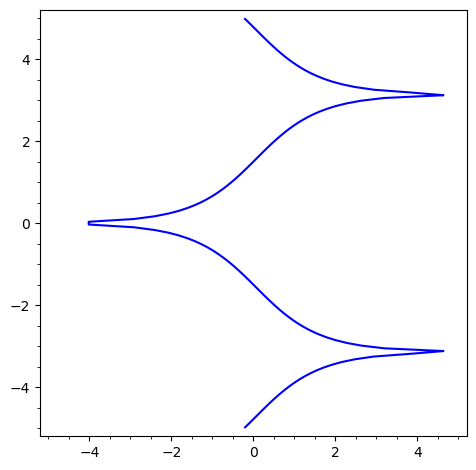

In [9]:
var("x", "y")

# 比較簡單的定義函數語法，代表 f 為 x, y 的函數：
f(x,y) = -1/2*log(cos(y) + 1) + 1/2*log(cos(y) - 1) - x + 1/2*log(cos(3/2) + 1) - 1/2*log(cos(3/2) - 1)

# 使用 implicit_plot 繪圖
p2 = implicit_plot(f, (x, -5, 5), (y, -5, 5), aspect_ratio=1)
p2

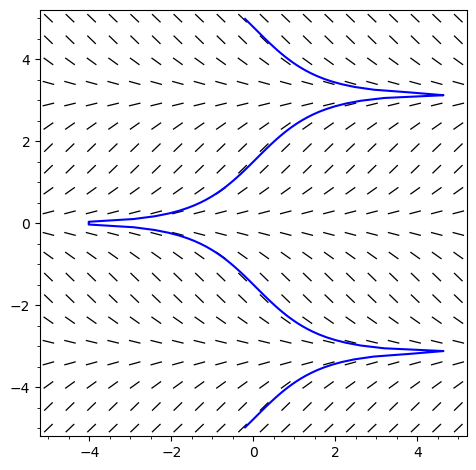

In [10]:
# 將此解曲線與方向場畫在一起：
p2 + sf2

#### 期末專題討論：

1. 為何會有這麼多解曲線？哪一條才是初始條件 $y(0) = -3/2$ 的曲線？
2. 要如何只畫出正確的解曲線？